1.Load data
2.Audit data
3.Data prepration adna data transformation
4.Data Visualization(Understand the distribution of the data)
5.Data Analysis

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
# from sklearn.linear_model import

In [105]:
train=pd.read_csv('bank-additional-full.csv',sep=';')

In [106]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [108]:
train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## DISTRIBUTION

<AxesSubplot:>

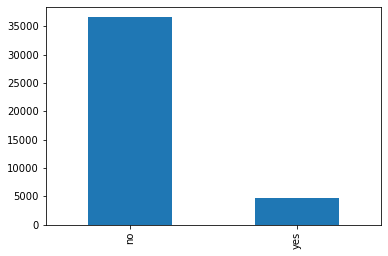

In [109]:
train['y'].value_counts().plot(kind='bar')

<AxesSubplot:>

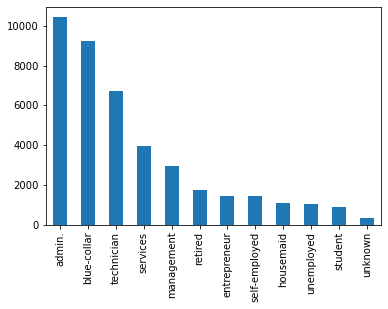

In [110]:
train['job'].value_counts().plot(kind='bar')

<AxesSubplot:>

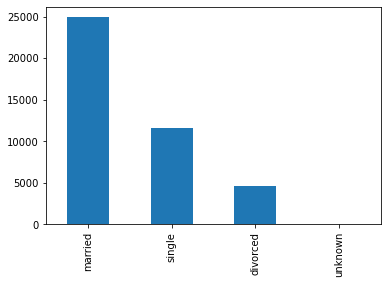

In [111]:
train['marital'].value_counts().plot(kind='bar')

<AxesSubplot:>

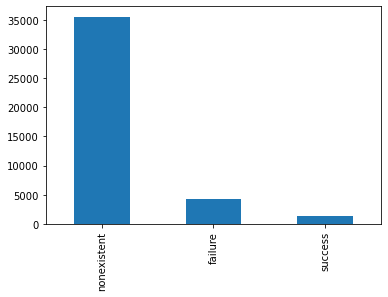

In [112]:
train['poutcome'].value_counts().plot(kind='bar')

In [113]:
train['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [114]:
train['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

<AxesSubplot:>

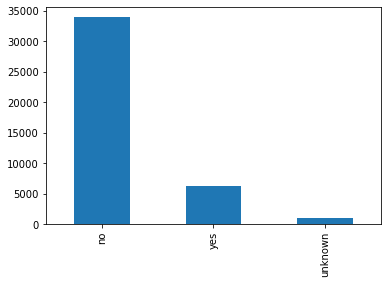

In [115]:
train['loan'].value_counts().plot(kind='bar')

In [116]:
# sns.pairplot(train)

In [117]:
# plt.figure(figsize=(12,8))
# sns.heatmap(train.corr(),annot=True)

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [119]:
from scipy.stats import chi2_contingency
def chi_sq(var1,var2):
    #check for categorical variable Relationshiop
    table=pd.crosstab(var1,var2)
    _,p,_,_=chi2_contingency(table)
    if p<=0.05:
        print('Accept the alternate hypothesis',round(p,2))
    else:
        print('failed to reject the null hypoyhesis',round(p,2))
    return table


### .NULL Hypothesis: job and y Status are Independet
### .Alternate hypothesis:job and y Status are dependent

In [120]:
chi_sq(train['job'],train['y'])


Accept the alternate hypothesis 0.0


y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [121]:
chi_sq(train['marital'],train['y'])


Accept the alternate hypothesis 0.0


y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [122]:
chi_sq(train['education'],train['y'])


Accept the alternate hypothesis 0.0


y,no,yes
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [123]:
chi_sq(train['default'],train['y'])


Accept the alternate hypothesis 0.0


y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


In [124]:
chi_sq(train['housing'],train['y'])


failed to reject the null hypoyhesis 0.06


y,no,yes
housing,,
no,16596,2026
unknown,883,107
yes,19069,2507


In [125]:
chi_sq(train['loan'],train['y'])


failed to reject the null hypoyhesis 0.58


y,no,yes
loan,,
no,30100,3850
unknown,883,107
yes,5565,683


In [126]:
chi_sq(train['contact'],train['y'])


Accept the alternate hypothesis 0.0


y,no,yes
contact,,
cellular,22291,3853
telephone,14257,787


In [127]:
chi_sq(train['month'],train['y'])


Accept the alternate hypothesis 0.0


y,no,yes
month,,
apr,2093,539
aug,5523,655
dec,93,89
jul,6525,649
jun,4759,559
mar,270,276
may,12883,886
nov,3685,416
oct,403,315


In [128]:
chi_sq(train['poutcome'],train['y']) # insignificatn matlab independent samjhi kya


Accept the alternate hypothesis 0.0


y,no,yes
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


In [129]:

chi_sq(train['day_of_week'],train['y'])


Accept the alternate hypothesis 0.0


y,no,yes
day_of_week,,
fri,6981,846
mon,7667,847
thu,7578,1045
tue,7137,953
wed,7185,949


In [130]:
pd.set_option('display.max_columns', None)

## ENCODE THE VARIABLES

In [131]:
x=train.iloc[:,:-1]
y=train['y']

In [132]:
df=x.select_dtypes(object).columns
x_enc=pd.get_dummies(x,columns=df)

In [133]:
x_enc.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [134]:
x_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [135]:
le=LabelEncoder()
y_enc=le.fit_transform(y)

In [136]:
xtrain,xtest,ytrain,ytest=train_test_split(x_enc,y_enc,test_size=0.2,random_state=12)

In [137]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(32950, 63)
(8238, 63)
(32950,)
(8238,)


## MODELLING

## LOGISTIC

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
pred_train_lg=lg.predict(xtrain)
pred_test_lg=lg.predict(xtest)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [140]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [141]:
def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    cm_matrix=confusion_matrix(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('the accuracy of tha model is ',acc_score)
    print(cm_matrix)
    print(class_rep)

In [142]:
acc_report(ytest,pred_test_lg)

the accuracy of tha model is  0.9102937606215101
[[7120  196]
 [ 543  379]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7316
           1       0.66      0.41      0.51       922

    accuracy                           0.91      8238
   macro avg       0.79      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [143]:
acc_report(ytrain,pred_train_lg)

the accuracy of tha model is  0.9101972685887708
[[28470   762]
 [ 2197  1521]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     29232
           1       0.67      0.41      0.51      3718

    accuracy                           0.91     32950
   macro avg       0.80      0.69      0.73     32950
weighted avg       0.90      0.91      0.90     32950



## DECISION TREE

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(xtrain,ytrain)
pred_test_dt=dt.predict(xtest)
pred_train_dt=dt.predict(xtrain)

In [146]:
acc_report(ytrain,pred_train_dt)

the accuracy of tha model is  0.9167830045523521
[[28286   946]
 [ 1796  1922]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     29232
           1       0.67      0.52      0.58      3718

    accuracy                           0.92     32950
   macro avg       0.81      0.74      0.77     32950
weighted avg       0.91      0.92      0.91     32950



In [147]:
acc_report(ytest,pred_test_dt)

the accuracy of tha model is  0.9149065307113377
[[7060  256]
 [ 445  477]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7316
           1       0.65      0.52      0.58       922

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



## RANDOM FOREST

In [148]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [149]:
rf=RandomForestClassifier(max_depth=4)
rf.fit(xtrain,ytrain)
pred_train_rf=rf.predict(xtrain)
pred_test_rf=rf.predict(xtest)

In [150]:
acc_report(ytrain,pred_train_rf)

the accuracy of tha model is  0.9005159332321699
[[29045   187]
 [ 3091   627]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     29232
           1       0.77      0.17      0.28      3718

    accuracy                           0.90     32950
   macro avg       0.84      0.58      0.61     32950
weighted avg       0.89      0.90      0.87     32950



In [151]:
acc_report(ytest,pred_test_rf)

the accuracy of tha model is  0.9004612770089827
[[7269   47]
 [ 773  149]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.95      7316
           1       0.76      0.16      0.27       922

    accuracy                           0.90      8238
   macro avg       0.83      0.58      0.61      8238
weighted avg       0.89      0.90      0.87      8238



## ADABOOST

In [152]:
ada=AdaBoostClassifier(n_estimators=150,learning_rate=0.9523)
ada.fit(xtrain,ytrain)
pred_train_ada=ada.predict(xtrain)
pred_test_ada=ada.predict(xtest)

In [153]:
acc_report(ytrain,pred_train_ada)

the accuracy of tha model is  0.9111077389984825
[[28487   745]
 [ 2184  1534]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     29232
           1       0.67      0.41      0.51      3718

    accuracy                           0.91     32950
   macro avg       0.80      0.69      0.73     32950
weighted avg       0.90      0.91      0.90     32950



In [154]:
acc_report(ytest,pred_test_ada)

the accuracy of tha model is  0.909686817188638
[[7115  201]
 [ 543  379]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7316
           1       0.65      0.41      0.50       922

    accuracy                           0.91      8238
   macro avg       0.79      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



## GRADIENT BOOSTING

In [155]:
gb=GradientBoostingClassifier(learning_rate=0.9445)
gb.fit(xtrain,ytrain)
pred_gb_train=gb.predict(xtrain)
pred_gb_test=gb.predict(xtest)

In [156]:
acc_report(ytrain,pred_gb_train)

the accuracy of tha model is  0.9405766312594841
[[28553   679]
 [ 1279  2439]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     29232
           1       0.78      0.66      0.71      3718

    accuracy                           0.94     32950
   macro avg       0.87      0.82      0.84     32950
weighted avg       0.94      0.94      0.94     32950



In [157]:
acc_report(ytest,pred_gb_test)

the accuracy of tha model is  0.9136926438455936
[[7024  292]
 [ 419  503]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7316
           1       0.63      0.55      0.59       922

    accuracy                           0.91      8238
   macro avg       0.79      0.75      0.77      8238
weighted avg       0.91      0.91      0.91      8238



## KNN

In [158]:
from sklearn.neighbors import KNeighborsClassifier


In [159]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
pred_test_knn=knn.predict(xtest)
pred_train_knn=knn.predict(xtrain)

In [160]:
acc_report(ytrain,pred_train_knn)

the accuracy of tha model is  0.9310166919575114
[[28404   828]
 [ 1445  2273]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     29232
           1       0.73      0.61      0.67      3718

    accuracy                           0.93     32950
   macro avg       0.84      0.79      0.81     32950
weighted avg       0.93      0.93      0.93     32950



In [161]:
acc_report(ytest,pred_test_knn)

the accuracy of tha model is  0.9041029376062151
[[6996  320]
 [ 470  452]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7316
           1       0.59      0.49      0.53       922

    accuracy                           0.90      8238
   macro avg       0.76      0.72      0.74      8238
weighted avg       0.90      0.90      0.90      8238



## XGBOOST

Run Support Vactor Machines

In [162]:
from sklearn.svm import SVC


In [163]:
svc=SVC(kernel='poly')
svc.fit(xtrain,ytrain)
svc_pred_train=svc.predict(xtrain)
svc_pred_test=svc.predict(xtest)

In [164]:
acc_report(ytrain,svc_pred_train)

the accuracy of tha model is  0.8975417298937785
[[28750   482]
 [ 2894   824]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     29232
           1       0.63      0.22      0.33      3718

    accuracy                           0.90     32950
   macro avg       0.77      0.60      0.64     32950
weighted avg       0.88      0.90      0.87     32950



In [165]:
acc_report(ytest,svc_pred_test)

the accuracy of tha model is  0.9002184996358339
[[7209  107]
 [ 715  207]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7316
           1       0.66      0.22      0.33       922

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238



In [166]:
svc.support_vectors_.shape

(6825, 63)

<AxesSubplot:>

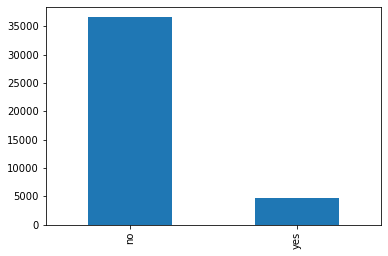

In [167]:
train['y'].value_counts().plot(kind='bar')

In [168]:
train['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Balancing the dataset using SMOTE

In [169]:
%pip install imblearn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



Making data balanced

In [170]:
oversample=SMOTE()

In [171]:
xsmote,ysmote=oversample.fit_resample(x_enc,y_enc)

In [172]:
print(xsmote.shape)
print(ysmote.shape)


(73096, 63)
(73096,)


In [173]:
from collections import Counter

In [174]:
Counter=Counter(ysmote)
print(Counter)

Counter({0: 36548, 1: 36548})


## X AND Y

Here we are doing splitting because earlier it was imbalanced data now we having balanced data for NAVIE BAYES 

In [175]:
xtrain_smote,xtest_smote,ytrain_smote,ytest_smote=train_test_split(xsmote,ysmote,test_size=0.2,random_state=120)

In [176]:
print(xtrain_smote.shape)
print(xtest_smote.shape)
print(ytrain_smote.shape)
print(ytest_smote.shape)

(58476, 63)
(14620, 63)
(58476,)
(14620,)


In [177]:
svc=SVC()
svc.fit(xtrain_smote,ytrain_smote)
pred_smote_svc_train=svc.predict(xtrain_smote)
pred_smote_svc_test=svc.predict(xtest_smote)

In [178]:
acc_report(ytrain_smote,pred_smote_svc_train)

the accuracy of tha model is  0.845680279088857
[[24452  4794]
 [ 4230 25000]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84     29246
           1       0.84      0.86      0.85     29230

    accuracy                           0.85     58476
   macro avg       0.85      0.85      0.85     58476
weighted avg       0.85      0.85      0.85     58476



In [179]:
acc_report(ytest_smote,pred_smote_svc_test)

the accuracy of tha model is  0.8493160054719562
[[6145 1157]
 [1046 6272]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      7302
           1       0.84      0.86      0.85      7318

    accuracy                           0.85     14620
   macro avg       0.85      0.85      0.85     14620
weighted avg       0.85      0.85      0.85     14620



In [180]:
from sklearn.naive_bayes import GaussianNB

In [181]:
gb=GaussianNB()
gb.fit(xtrain_smote,ytrain_smote)

GaussianNB()

In [182]:
pred_smote_train_gb=gb.predict(xtrain_smote)
pred_smote_test_gb=gb.predict(xtest_smote)

In [183]:
acc_report(ytrain_smote,pred_smote_train_gb)

the accuracy of tha model is  0.887800123127437
[[25725  3521]
 [ 3040 26190]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     29246
           1       0.88      0.90      0.89     29230

    accuracy                           0.89     58476
   macro avg       0.89      0.89      0.89     58476
weighted avg       0.89      0.89      0.89     58476



In [184]:
acc_report(ytest_smote,pred_smote_test_gb)

the accuracy of tha model is  0.892749658002736
[[6465  837]
 [ 731 6587]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7302
           1       0.89      0.90      0.89      7318

    accuracy                           0.89     14620
   macro avg       0.89      0.89      0.89     14620
weighted avg       0.89      0.89      0.89     14620



## NAIVE BAYES WITHOUT SMOTE

In [185]:
gb_nosmote=GaussianNB()
# gb=GaussianNB()
gb.fit(xtrain,ytrain)


GaussianNB()

In [186]:
pred_nosmote_train_gb=gb.predict(xtrain)
pred_nosmote_test_gb=gb.predict(xtest)

In [187]:
acc_report(ytrain,pred_nosmote_train_gb)

the accuracy of tha model is  0.8632776934749621
[[26517  2715]
 [ 1790  1928]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     29232
           1       0.42      0.52      0.46      3718

    accuracy                           0.86     32950
   macro avg       0.68      0.71      0.69     32950
weighted avg       0.88      0.86      0.87     32950



In [188]:
acc_report(ytest,pred_nosmote_test_gb)

the accuracy of tha model is  0.8679291090070406
[[6687  629]
 [ 459  463]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      7316
           1       0.42      0.50      0.46       922

    accuracy                           0.87      8238
   macro avg       0.68      0.71      0.69      8238
weighted avg       0.88      0.87      0.87      8238



## DEPLOYING

In [189]:
import pickle
import gradio as gr

In [190]:
with open('knn_model.pkl','wb') as f:
    pickle.dump(gb,f)

In [191]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [192]:
x_enc.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [193]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [194]:
def make_prediction(age, duration, campaign, pdays, previous, emp_var_rate,
       cons_price_idx, cons_conf_idx, euriborm,nr_employed,
       job_admin, job_bluecollar, job_entrepreneur, job_housemaid,
       job_management, job_retired, job_selfemployed, job_services,
       job_student, job_technician, job_unemployed, job_unknown,
       marital_divorced, marital_married, marital_single,
       marital_unknown, education_basic4y, education_basic6y,
       education_basic9y, education_highschool, education_illiterate,
       education_professionalcourse, education_universitydegree,
       education_unknown, default_no, default_unknown, default_yes,
       housing_no, housing_unknown, housing_yes, loan_no,
       loan_unknown, loan_yes, contact_cellular, contact_telephone,
       month_apr, month_aug, month_dec, month_jul, month_jun,
       month_mar, month_may, month_nov, month_oct, month_sep,
       day_of_week_fri, day_of_week_mon, day_of_week_thu,
       day_of_week_tue, day_of_week_wed, poutcome_failure,
       poutcome_nonexistent, poutcome_success):
    with open('knn_model.pkl','rb')as f:
        clf=pickle.load(f)
        pred=clf.predict([[age, duration, campaign, pdays, previous, emp_var_rate,
       cons_price_idx, cons_conf_idx, euriborm,nr_employed,
       job_admin, job_bluecollar, job_entrepreneur, job_housemaid,
       job_management, job_retired, job_selfemployed, job_services,
       job_student, job_technician, job_unemployed, job_unknown,
       marital_divorced, marital_married, marital_single,
       marital_unknown, education_basic4y, education_basic6y,
       education_basic9y, education_highschool, education_illiterate,
       education_professionalcourse, education_universitydegree,
       education_unknown, default_no, default_unknown, default_yes,
       housing_no, housing_unknown, housing_yes, loan_no,
       loan_unknown, loan_yes, contact_cellular, contact_telephone,
       month_apr, month_aug, month_dec, month_jul, month_jun,
       month_mar, month_may, month_nov, month_oct, month_sep,
       day_of_week_fri, day_of_week_mon, day_of_week_thu,
       day_of_week_tue, day_of_week_wed, poutcome_failure,
       poutcome_nonexistent, poutcome_success]])
    if pred=='yes':
        return('will take loan')
    else:
        return('will not take loan')

In [195]:
age=gr.Number(label='enter age')
duration=gr.Number(label='enter duration')
campaign=gr.Number(label='enter campign')
pdays=gr.Number(label='enter pdays')
previous=gr.Number(label='enter previous')
emp_var_rate=gr.Number(label='enter empvarrate')
cons_price_idx =gr.Number(label='enter conspriceidx')
cons_conf_idx=gr.Number(label='enter consconfidx')
euriborm=gr.Number(label='enter euribor3m')
nr_employed=gr.Number(label='enter nremployed')
job_admin=gr.Number(label='whether job is admin')
job_bluecollar=gr.Number(label='whether job is bluecollar')
job_entrepreneur=gr.Number(label='whether job is euntreprenur')
job_housemaid=gr.Number(label='whether job is house maid')
job_management=gr.Number(label='whether job is management')
job_retired=gr.Number(label='whether job is retired')
job_selfemployed=gr.Number(label='whether job is self empoyed')
job_services=gr.Number(label='whether job is services')
job_student=gr.Number(label='whether job is student')
job_technician=gr.Number(label='whether job is technician')
job_unemployed=gr.Number(label='whether job is unemployed')
job_unknown=gr.Number(label='whether job is unkown')
marital_divorced=gr.Number(label='whether marital is divorced')
marital_married=gr.Number(label='whether marital is married')
marital_single=gr.Number(label='whether marital is single')
marital_unknown=gr.Number(label='whether marital is unknown')
education_basic4y=gr.Number(label='whether education is basic 4 year')
education_basic6y=gr.Number(label='whether education is basic 6 year')
education_basic9y=gr.Number(label='wether education is basic 9 year')
education_highschool=gr.Number(label='whether education is highschool')
education_illiterate=gr.Number(label='whether education is illitrate')
education_professionalcourse=gr.Number(label='whether education is proffesional course')
education_universitydegree=gr.Number(label='wether education is university degree')
education_unknown=gr.Number(label='whether education unkown')
default_no=gr.Number(label='wther default no')
default_unknown=gr.Number(label='whether default unkown')
default_yes=gr.Number(label='whether default yes')
housing_no=gr.Number(label='whether housing in no')
housing_unknown=gr.Number(label='whwwther housing is unknown')
housing_yes=gr.Number(label='whether housing is yes')
loan_no=gr.Number(label='whether got loan is no')
loan_unknown=gr.Number(label='whether got loan is unknown ')
loan_yes=gr.Number(label='whether got loan is yes')
contact_cellular=gr.Number(label='whether contact is cellular')
contact_telephone=gr.Number(label='whether contact is telephone')
month_apr=gr.Number(label='whether month is apr')
month_aug=gr.Number(label='whether month is aug')
month_dec=gr.Number(label='whther month is dec')
month_jul=gr.Number(label='whether month is jul')
month_jun=gr.Number(label='whether month is jun')
month_mar =gr.Number(label='whether month is mar')
month_may=gr.Number(label='whether month is may')
month_nov=gr.Number(label='whether month is nov')
month_oct=gr.Number(label='whether month is oct')
month_sep=gr.Number(label='wether month is sep ')
day_of_week_fri=gr.Number(label='whether day of week is fri')
day_of_week_mon=gr.Number(label='whether day of week is mon')
day_of_week_thu=gr.Number(label='whether day of week is thu')
day_of_week_tue=gr.Number(label='whether day of week is tue')
day_of_week_wed=gr.Number(label='whether day of week is wed')
poutcome_failure=gr.Number(label='whether poutcome is failure')
poutcome_nonexistent=gr.Number(label='whether poutcome is non existent ')
poutcome_success=gr.Number(label='whether poutcome is success')
output=gr.Textbox()

In [196]:
app=gr.Interface(fn=make_prediction,inputs=[age, duration, campaign, pdays, previous,emp_var_rate,
       cons_price_idx, cons_conf_idx, euriborm,nr_employed,
       job_admin, job_bluecollar, job_entrepreneur, job_housemaid,
       job_management, job_retired, job_selfemployed, job_services,
       job_student, job_technician, job_unemployed, job_unknown,
       marital_divorced, marital_married, marital_single,
       marital_unknown, education_basic4y, education_basic6y,
       education_basic9y, education_highschool, education_illiterate,
       education_professionalcourse, education_universitydegree,
       education_unknown, default_no, default_unknown, default_yes,
       housing_no, housing_unknown, housing_yes, loan_no,
       loan_unknown, loan_yes, contact_cellular, contact_telephone,
       month_apr, month_aug, month_dec, month_jul, month_jun,
       month_mar, month_may, month_nov, month_oct, month_sep,
       day_of_week_fri, day_of_week_mon, day_of_week_thu,
       day_of_week_tue, day_of_week_wed, poutcome_failure,
       poutcome_nonexistent, poutcome_success],outputs=output)
app.launch(debug=True)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\samee\AppData\Local\Temp\ipykernel_4052\2019886939.py:37: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pred=='yes':


Keyboard interruption in main thread... closing server.
